1. Ref: https://www.kaggle.com/bavalpreet26/cnn-tutorial-keras-nb2
2. dataset: https://www.kaggle.com/tongpython/cat-and-dog/notebooks?datasetId=23777&sortBy=voteCount

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
classes = ['cats', 'dogs']
train_path = 'dataset/training_set/'
test_path = 'dataset/test_set/'
lr = 0.0001
epochs = 50
algorithm = 'Vgg'

In [3]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(
    directory=train_path,
    target_size=(224,224),
    classes=['cats', 'dogs'],
    batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    classes=['cats', 'dogs'],
    batch_size=10, shuffle=False)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

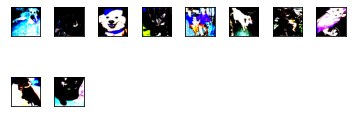

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [4]:
def plotImages(images):
    plt.figure(figsize=(5,5))
    for i in range(len(images)):
        plt.subplot(5,8,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])  
    plt.tight_layout()     
    plt.show()   
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [5]:
def get_model(name):
    if name == '1':
        inputs = keras.Input(shape=(224,224,3), name="images-input")
        x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
        x = layers.MaxPool2D(pool_size=2, strides=2)(x)
        x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
        x = layers.MaxPool2D(pool_size=2, strides=2)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(units=2, activation='softmax')(x)
        model = keras.Model(inputs, outputs, name='conv3_classifier')
    elif name == 'Resnet':
        inputs = keras.Input(shape=(224,224,3), name="images-input")
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(inputs)
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x)
        
        x = layers.Flatten()(x)
        x = layers.Dense(4096, activation="relu")(x)
        x = layers.Dense(4096, activation="relu")(x)
        outputs = layers.Dense(2, activation="softmax")(x)
        model = keras.Model(inputs, outputs, name='Resnet_classifier')
    elif name=='Vgg':
        inputs = keras.Input(shape=(224,224,3), name="images-input")
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(inputs)
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x)

        x = layers.Flatten()(x)
        x = layers.Dense(4096, activation="relu")(x)
        x = layers.Dense(4096, activation="relu")(x)
        outputs = layers.Dense(2, activation="softmax")(x)
        model = keras.Model(inputs, outputs, name='Vgg_classifier')
    else:
        raise RuntimeError('error')       
    return model
    

In [6]:
model = get_model(algorithm)
model.summary()

Model: "Vgg_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
images-input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)    

In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
     loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, epochs=epochs, verbose=1)

  ...
    to  
  ['...']
Train for 801 steps
Epoch 1/50
801/801 [==============================] - 68s 85ms/step - loss: 0.7005 - accuracy: 0.5088
Epoch 2/50
801/801 [==============================] - 63s 78ms/step - loss: 0.6930 - accuracy: 0.5187
Epoch 3/50
801/801 [==============================] - 62s 78ms/step - loss: 0.6965 - accuracy: 0.5324
Epoch 4/50
801/801 [==============================] - 63s 78ms/step - loss: 0.6879 - accuracy: 0.5467
Epoch 5/50
801/801 [==============================] - 63s 78ms/step - loss: 0.6730 - accuracy: 0.5898
Epoch 6/50
801/801 [==============================] - 63s 78ms/step - loss: 0.6155 - accuracy: 0.6611
Epoch 7/50
801/801 [==============================] - 63s 78ms/step - loss: 0.5593 - accuracy: 0.7132
Epoch 8/50
801/801 [==============================] - 63s 78ms/step - loss: 0.5082 - accuracy: 0.7544
Epoch 9/50
801/801 [==============================] - 63s 78ms/step - loss: 0.4506 - accuracy: 0.7900
Epoch 10/50
801/801 [================

In [8]:
import datetime
datetime_dt = datetime.datetime.today()# 獲得當地時間
datetime_str = datetime_dt.strftime("%Y-%m-%d_%H-%M")
model.save(f'{model.name}_{datetime_str}.h5')

In [9]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.tail()

,loss,accuracy
45,0.012761,0.995753
46,0.009781,0.997626
47,0.018828,0.994379
48,0.022460,0.994503
49,0.025677,0.993004


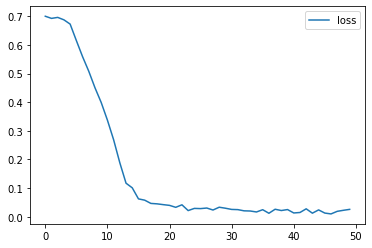

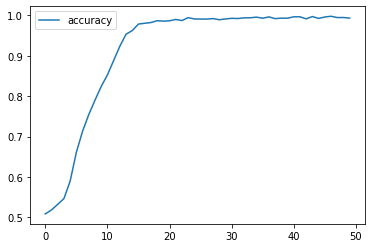

In [10]:
history_frame.loc[:, ['loss']].plot()
plt.savefig(f'{model.name}_loss_{datetime_str}.png')
history_frame.loc[:, ['accuracy']].plot()
plt.savefig(f'{model.name}_acc_{datetime_str}.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

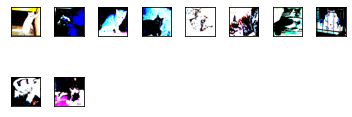

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [12]:
x, y = next(test_batches)
test_scores = model.evaluate(x, y, verbose=1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

10/10 [==============================] - 0s 19ms/sample - loss: 2.7377 - accuracy: 0.8000
Test loss: 2.73773193359375
Test accuracy: 0.8


In [13]:
predictions = model.predict(x=test_batches, verbose=2)

203/203 - 5s


In [14]:
predictions.shape

(2023, 2)

In [15]:
y_true = test_batches.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
y_true.shape

(2023,)

In [17]:
y_pred = np.argmax(predictions, axis=-1)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
y_pred.shape

(2023,)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm

array([[843, 168],
       [255, 757]], dtype=int64)

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          date=''):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    test_accuracy = (cm[0][0] + cm[1][1]) /(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(f'{title}, test_acc: {round(test_accuracy,3)}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'confusion-maxtrix_{date}.png')

Confusion matrix, without normalization


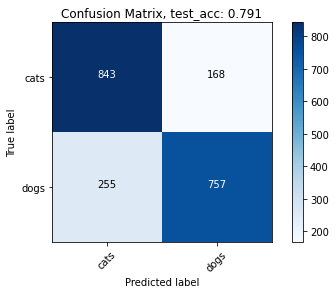

In [21]:
plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix', date=datetime_str)